# **Application des méthodes de prévision sur les données directionnelles :**

In [166]:
""" Importation des packages  """
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import eda
import os
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, GroupKFold
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
os.chdir(os.getcwd()) 

from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"  # pour retablir l'affichage des sorties des celulles



In [154]:
""" Importation des données """
df = pd.read_csv('GWMF_Dataset.DAT')
df_direction = pd.read_csv('GWMF_v_direction_Dataset.DAT')

In [155]:
df.shape

(16197, 20)

In [156]:
"""Analyse des valeurs manquantes du data frame : """

description_base  = eda.create_unique(df)
description_base

,Column_name,Data_type,Number_of_unique,Number_of_missing,Percentage_of_missing,Unique_values
0,Unnamed: 0,int64,16197,0,0.0,More than 15 unique values
1,tp,float64,3206,0,0.0,More than 15 unique values
2,lnsp,float64,10460,0,0.0,More than 15 unique values
3,temp19,float64,15784,0,0.0,More than 15 unique values
4,temp9,float64,15531,0,0.0,More than 15 unique values
5,temp2,float64,14986,0,0.0,More than 15 unique values
6,temp0,float64,15263,0,0.0,More than 15 unique values
7,u19,float64,16060,0,0.0,More than 15 unique values
8,u9,float64,16078,0,0.0,More than 15 unique values
9,u2,float64,16034,0,0.0,More than 15 unique values


In [157]:
""" Fusion des deux dataframe """

df_direction = pd.concat([df_direction, df.drop('abs_gwmf', axis=1)], axis=1)
df_direction.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_direction = df_direction.iloc[:, :-1]



In [158]:
df_direction.columns

Index(['balloon', 'gwmf_v', 'gwmf_v_abs', 'gwmf_v_north', 'gwmf_v_south', 'tp',
       'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19', 'u9', 'u2', 'u0',
       'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd'],
      dtype='object')

In [159]:
df_direction.head()	

,balloon,gwmf_v,gwmf_v_abs,gwmf_v_north,gwmf_v_south,tp,lnsp,temp19,temp9,temp2,...,u9,u2,u0,v19,v9,v2,v0,sza,tp_mean,tp_sd
0,1,-0.004952,0.004419,0.000404,0.005356,1.283398e-05,11.520824,198.78241,246.25427,288.58835,...,-1.062763,-0.763388,-1.085501,8.394401,1.220549,1.909220,1.536844,131.556030,0.000044,0.000043
1,1,-0.000536,0.001380,0.000718,0.001254,1.818147e-05,11.521313,198.87085,246.25975,288.65485,...,-0.841705,-1.202977,-1.242136,8.366734,1.351404,1.903986,1.593673,118.018845,0.000039,0.000047
2,1,0.000377,0.000965,0.000669,0.000292,6.938894e-18,11.521270,198.46156,246.25015,289.30478,...,-0.680017,-3.652297,-1.132238,8.040718,1.461322,1.232512,1.355890,104.009210,0.000026,0.000041
3,1,0.000567,0.000584,0.000590,0.000022,6.938894e-18,11.521748,198.43893,246.24603,289.34730,...,-0.566331,-4.113360,-1.278768,8.087078,1.756681,1.065766,1.406737,89.609990,0.000035,0.000044
4,1,0.000042,0.000638,0.000402,0.000360,6.938894e-18,11.522120,198.35872,246.30430,289.43370,...,-0.666122,-4.532739,-1.613513,7.729657,1.850896,0.691146,1.361872,75.231340,0.000032,0.000043


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Séparation des données selon la variable 'balloon'
train_df_direction = df_direction[df_direction['balloon'] <= 7]
test_df_direction = df_direction[df_direction['balloon'] == 8]

features = ['tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19', 'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']
targets = ['gwmf_v_abs', 'gwmf_v_north', 'gwmf_v_south']

X_train = train_df_direction[features]
y_train = train_df_direction[targets]
X_test = test_df_direction[features]
y_test = test_df_direction[targets]

# Modélisation et évaluation pour chaque cible
results = {}
for target in targets:
    # Régression linéaire
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train[target])
    lin_pred = lin_reg.predict(X_test)
    lin_rmse = mean_squared_error(y_test[target], lin_pred, squared=False)
    
    # Random forest
    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train, y_train[target])
    rf_pred = rf_reg.predict(X_test)
    rf_rmse = mean_squared_error(y_test[target], rf_pred, squared=False)
    
    # Importance des variables pour le Random forest
    feature_importances = pd.Series(rf_reg.feature_importances_, index=features).sort_values(ascending=False)

    # Graphique des prédictions et des valeurs réelles
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[target].reset_index(drop=True), label='Valeurs réelles')
    plt.plot(lin_pred, label='Prédiction Régression Linéaire', color = 'red', linestyle='--')
    plt.plot(rf_pred, label='Prédiction Forêt Aléatoire', color = 'purple' linestyle='--')
    plt.title(f'Comparaison des prédictions pour {target}')
    plt.xlabel('Index')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.show()

    results[target] = {
        'Linear Regression RMSE': lin_rmse,
        'Random Forest RMSE': rf_rmse,
        'Feature Importances': feature_importances
    }

for target, result in results.items():
    print(f"Results for {target}:")
    print(f"Linear Regression RMSE: {result['Linear Regression RMSE']}")
    print(f"Random Forest RMSE: {result['Random Forest RMSE']}")
    print("Feature Importances:")
    print(result['Feature Importances'])
    print("\n")


Results for gwmf_v_abs:
Linear Regression RMSE: 0.0006967122431745627
Random Forest RMSE: 0.0005975624334159705
Feature Importances:
sza        0.119840
u19        0.091784
temp2      0.079479
u2         0.072534
temp19     0.062689
tp_mean    0.059589
u9         0.057856
tp         0.055296
v0         0.054000
lnsp       0.053287
u0         0.052008
v9         0.051774
temp0      0.043354
v19        0.041336
temp9      0.035758
tp_sd      0.035757
v2         0.033659
dtype: float64


Results for gwmf_v_north:
Linear Regression RMSE: 0.0003753977746939401
Random Forest RMSE: 0.00033326646322895967
Feature Importances:
u2         0.206827
tp_mean    0.082519
sza        0.078001
temp2      0.077420
lnsp       0.076749
u19        0.053203
temp19     0.052999
tp_sd      0.049699
u0         0.046985
u9         0.042861
v9         0.042434
temp0      0.036401
v0         0.034879
v19        0.031693
v2         0.029248
tp         0.029104
temp9      0.028980
dtype: float64


Results for gwmf_

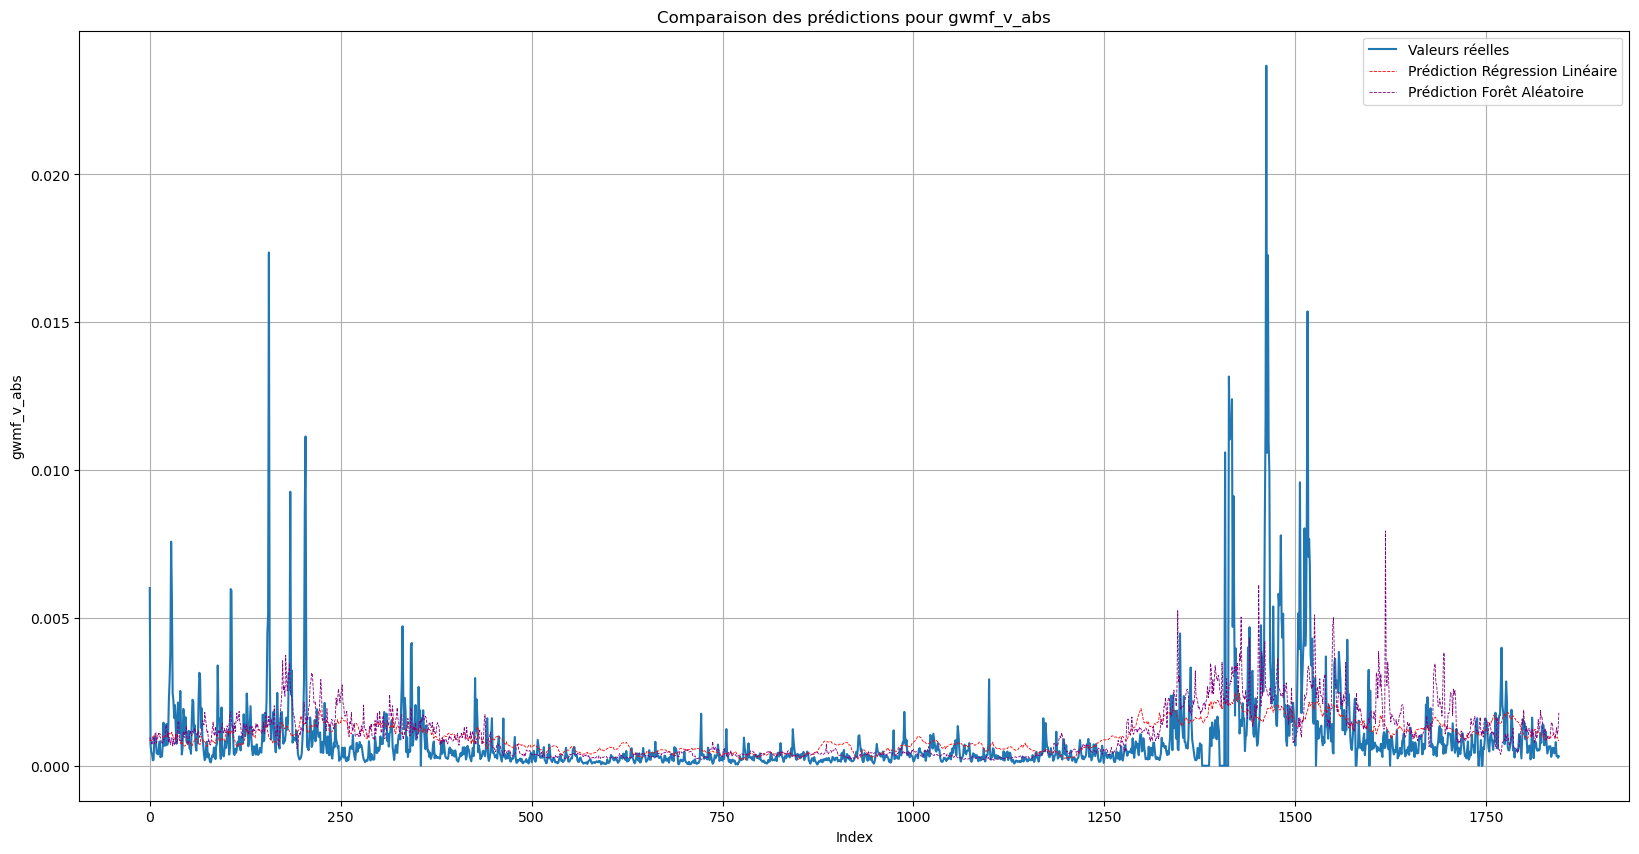

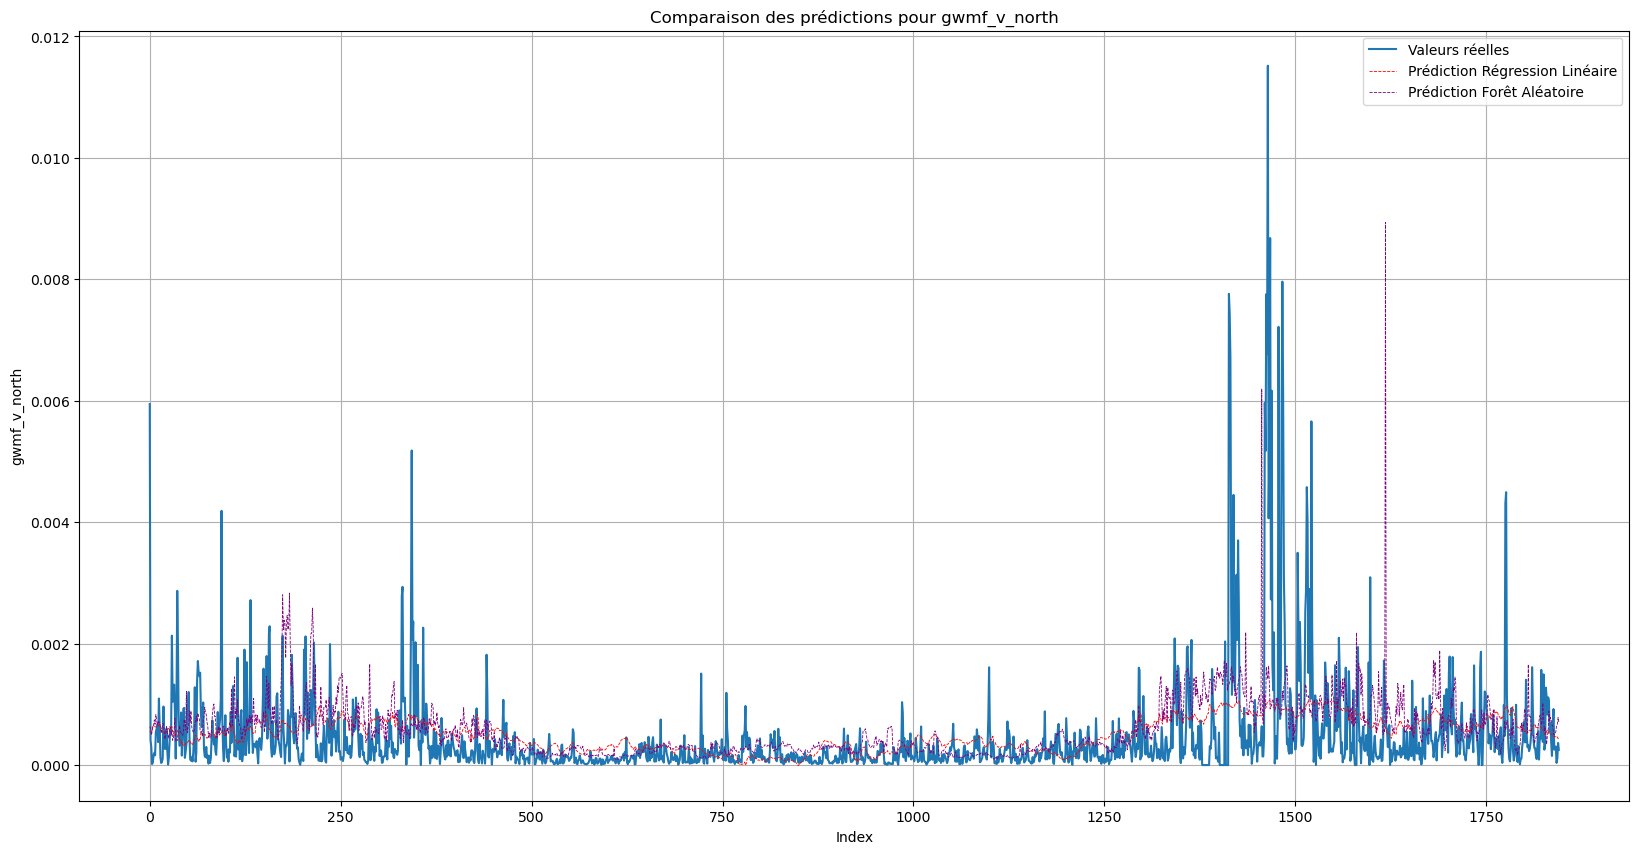

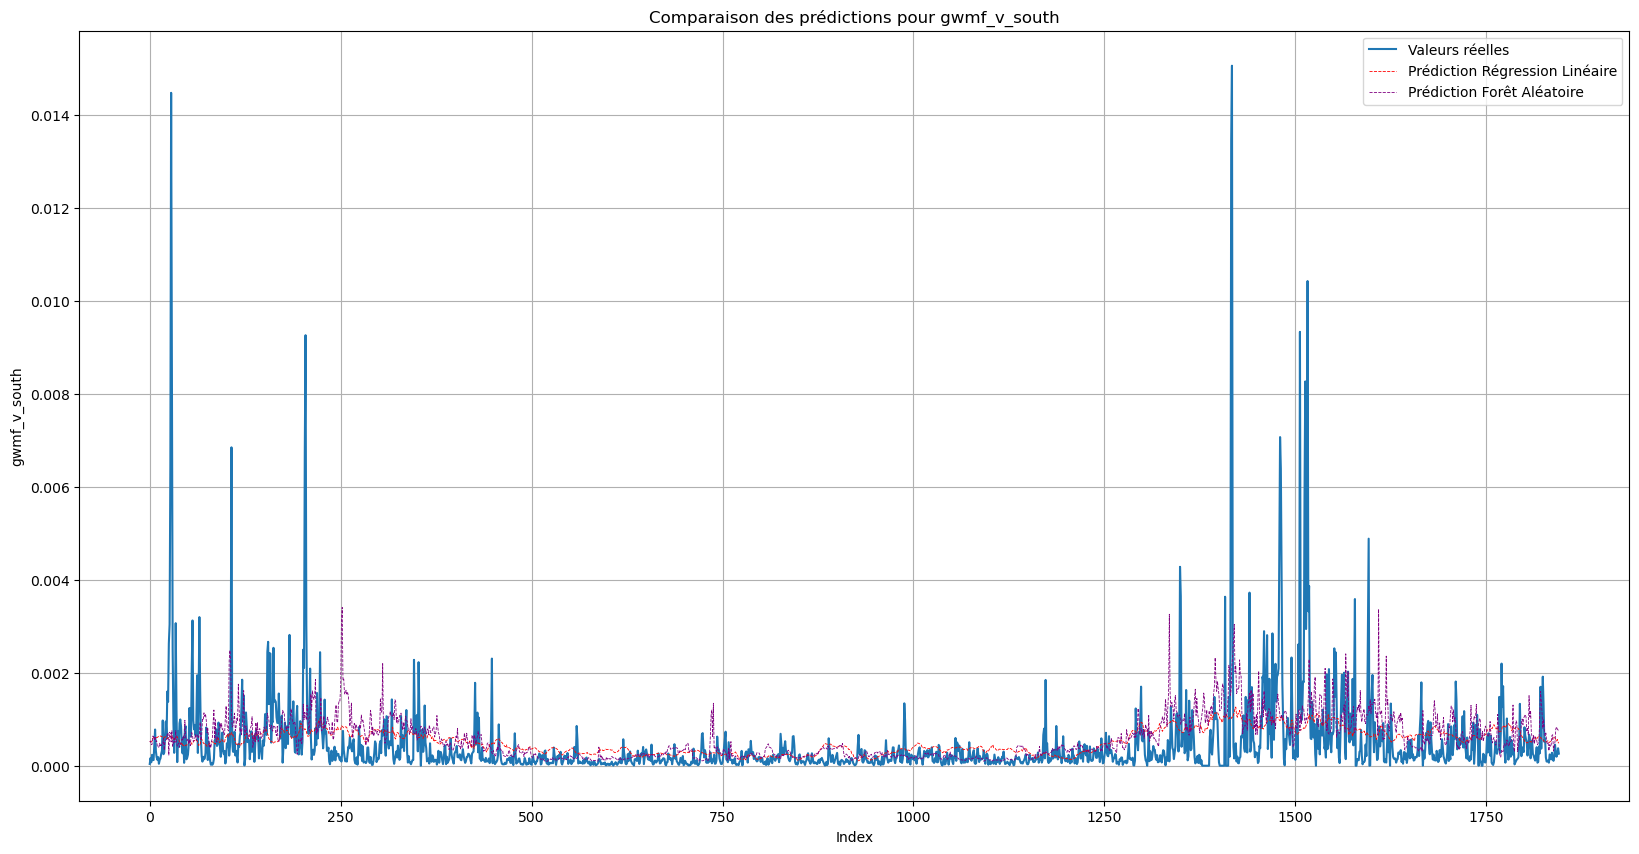

Results for gwmf_v_abs:
Linear Regression RMSE: 0.0014262004431864533
Random Forest RMSE: 0.0014505051417476374
Feature Importances:
u19        0.122000
lnsp       0.101725
tp_sd      0.082421
u0         0.071312
temp2      0.069731
temp19     0.057922
u2         0.054555
v9         0.050929
sza        0.049924
tp_mean    0.049532
v19        0.048600
v0         0.046355
temp9      0.045062
tp         0.042235
temp0      0.039360
u9         0.037768
v2         0.030571
dtype: float64


Results for gwmf_v_north:
Linear Regression RMSE: 0.0007841368591214768
Random Forest RMSE: 0.0008475785683406601
Feature Importances:
lnsp       0.167861
temp2      0.161488
u0         0.145219
u19        0.067823
v9         0.055805
tp_mean    0.045665
tp_sd      0.044387
u2         0.039406
temp19     0.039333
sza        0.037723
temp0      0.034099
u9         0.033485
v0         0.031603
v2         0.027829
v19        0.025489
temp9      0.025458
tp         0.017326
dtype: float64


Results for gwmf_v

In [161]:
# Séparation des données selon la variable 'balloon'
train_df_direction = df_direction[df_direction['balloon'] <= 7]
test_df_direction = df_direction[df_direction['balloon'] == 8]

features = ['tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19', 'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']
targets = ['gwmf_v_abs', 'gwmf_v_north', 'gwmf_v_south']

X_train = train_df_direction[features]
y_train = train_df_direction[targets]
X_test = test_df_direction[features]
y_test = test_df_direction[targets]

# Modélisation et évaluation pour chaque cible
results = {}
for target in targets:
    # Régression linéaire
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train[target])
    lin_pred = lin_reg.predict(X_test)
    lin_rmse = mean_squared_error(y_test[target], lin_pred, squared=False)
    
    # Random forest
    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train, y_train[target])
    rf_pred = rf_reg.predict(X_test)
    rf_rmse = mean_squared_error(y_test[target], rf_pred, squared=False)
    
    # Importance des variables pour le Random forest
    feature_importances = pd.Series(rf_reg.feature_importances_, index=features).sort_values(ascending=False)

    # Graphique des prédictions et des valeurs réelles
    plt.figure(figsize=(20, 10))
    plt.plot(y_test[target].reset_index(drop=True), label='Valeurs réelles')
    plt.plot(lin_pred, label='Prédiction Régression Linéaire', color = 'red', linestyle='--', linewidth= 0.8)
    plt.plot(rf_pred, label='Prédiction Forêt Aléatoire', color = 'purple', linestyle='--', linewidth = 0.8)
    plt.title(f'Comparaison des prédictions pour {target}')
    plt.xlabel('Index')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.show()

    results[target] = {
        'Linear Regression RMSE': lin_rmse,
        'Random Forest RMSE': rf_rmse,
        'Feature Importances': feature_importances
    }

for target, result in results.items():
    print(f"Results for {target}:")
    print(f"Linear Regression RMSE: {result['Linear Regression RMSE']}")
    print(f"Random Forest RMSE: {result['Random Forest RMSE']}")
    print("Feature Importances:")
    print(result['Feature Importances'])
    print("\n")

## **Introductiond des modèles linéaire avec pénalisations : LASSO et RIDGE** : 
### **Optimisation du paramètre alpha**

In [162]:
from sklearn.linear_model import Lasso, Ridge

X = df_direction[features]
y = df_direction[targets] # on optimise séparament par variable cible

# Configuration de GroupKFold pour ne pas mélanger les ballons
groups = df_direction['balloon']
gkf = GroupKFold(n_splits=6)  # Utiliser le nombre approprié de ballons

# Définition des plages d'alpha à tester
alpha_range = np.logspace(-4, 1, 10)  # Couvre une plage de 0.0001 à 10

# Initialisation du dictionnaire pour stocker les meilleurs modèles
best_models = {}

for target in y:
    print(f"\nOptimizing for {target}")

    # LASSO
    lasso_grid = GridSearchCV(Lasso(), param_grid={'alpha': alpha_range}, cv=gkf, scoring='neg_mean_squared_error', verbose=1)
    lasso_grid.fit(X, y[target], groups=groups)
    best_lasso = lasso_grid.best_estimator_
    best_models[f'Lasso_{target}'] = best_lasso
    print(f"Best Lasso alpha for {target}: {lasso_grid.best_params_['alpha']}")

    # RIDGE
    ridge_grid = GridSearchCV(Ridge(), param_grid={'alpha': alpha_range}, cv=gkf, scoring='neg_mean_squared_error', verbose=1)
    ridge_grid.fit(X, y[target], groups=groups)
    best_ridge = ridge_grid.best_estimator_
    best_models[f'Ridge_{target}'] = best_ridge
    print(f"Best Ridge alpha for {target}: {ridge_grid.best_params_['alpha']}")


Optimizing for gwmf_v_abs
Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best Lasso alpha for gwmf_v_abs: 0.0001
Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best Ridge alpha for gwmf_v_abs: 0.004641588833612782

Optimizing for gwmf_v_north
Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best Lasso alpha for gwmf_v_north: 0.0001
Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best Ridge alpha for gwmf_v_north: 10.0

Optimizing for gwmf_v_south
Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best Lasso alpha for gwmf_v_south: 0.0001
Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best Ridge alpha for gwmf_v_south: 0.016681005372000592


### **Choix des variables :**
Posibilités ? 
- coefficient du lasso 
- moyenne des importances sur chaque ballons 


### **Evaluation de l'ensemble des modèles**

In [163]:
""" Evaluation des modeles avace validation croissées sur chaques ballons  """

kf = KFold(n_splits=8, shuffle=False)  # atttention : Pas de mélange car l'ordre des ballons doit être respecté

features = ['tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19', 'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']
targets = ['gwmf_v_abs', 'gwmf_v_north', 'gwmf_v_south']

"""Initialisation des modèles à comparer"""

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': LassoCV(cv=kf, shuffle=True, random_state=42)),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN' : KNeighborsRegressor()
}
# Dictionnaire pour stocker les erreurs RMSE pour chaque modèle
rmse_errors = {name: [] for name in models}

# stockage des scores RMSE
rmse_scores_rf = {target: [] for target in targets}
rmse_scores_lr = {target: [] for target in targets}
rmse_scores_lasso = {target: [] for target in targets}
rmse_scores_ridge = {target: [] for target in targets}

for train_index, test_index in kf.split(np.unique(df_direction['balloon'])):
    print ( f'En cours ... ballon{test_index} ...'  )
    # Création des ensembles de données de train et de test basés sur le ballon
    train_balloon = np.unique(df_direction['balloon'])[train_index]
    test_balloon = np.unique(df_direction['balloon'])[test_index]

    train_data = df_direction[df_direction['balloon'].isin(train_balloon)]
    test_data = df_direction[df_direction['balloon'].isin(test_balloon)]

    X_train, y_train = train_data[features], train_data[targets]
    X_test, y_test = test_data[features], test_data[targets]

    for target in targets:
            # Boucle sur chaque modèle
        for name, model in models.items():

            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            # Calcul du RMSE pour le ballon actuel
            rmse = mean_squared_error(y_test, predictions)
            # Stockage du RMSE dans le dictionnaire
            rmse_errors[name].append(rmse)

        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train[target])
        lin_pred = lin_reg.predict(X_test)
        lin_rmse = mean_squared_error(y_test[target], lin_pred, squared=False)
        rmse_scores_lr[target].append(lin_rmse)

        # Random forest
        rf_reg = RandomForestRegressor(random_state=42)
        rf_reg.fit(X_train, y_train[target])
        rf_pred = rf_reg.predict(X_test)
        rmse = mean_squared_error(y_test[target], rf_pred, squared=False)
        rmse_scores_rf[target].append(rmse)

        # LASSO
        lasso_reg = Lasso(alpha=0.01)  # alpha peut être ajusté ou optimisé également
        lasso_reg.fit(X_train, y_train[target])
        lasso_pred = lasso_reg.predict(X_test)
        lasso_rmse = mean_squared_error(y_test[target], lasso_pred, squared=False)
        rmse_scores_lasso[target].append(lasso_rmse)

        # KNN

# Calcul et affichage des RMSE moyens pour chaque cible (Random forest)
print ('______________________ \n *** RANDOM FOREST *** \n ______________________')

for target, scores in rmse_scores_rf.items():
    average_rmse = np.mean(scores)
    print(f"Average RMSE for {target}: {average_rmse}")

# Calcul et affichage des RMSE moyens pour chaque cible ( Linear regression )
print ('______________________ \n *** LINEAR REGRESSION *** \n ______________________')
for target, scores in rmse_scores_lr.items():
    average_rmse = np.mean(scores)
    print(f"Average RMSE for {target}: {average_rmse}")

print('______________________ \n *** LASSO *** \n ______________________')
for target, scores in rmse_scores_lasso.items():
    average_rmse = np.mean(scores)
    print(f"Average RMSE for {target}: {average_rmse}")

print('______________________ \n *** RIDGE *** \n ______________________')
for target, scores in rmse_scores_ridge.items():
    average_rmse = np.mean(scores)
    print(f"Average RMSE for {target}: {average_rmse}")


En cours ... ballon[0] ...
En cours ... ballon[1] ...
En cours ... ballon[2] ...
En cours ... ballon[3] ...
En cours ... ballon[4] ...
En cours ... ballon[5] ...
En cours ... ballon[6] ...
En cours ... ballon[7] ...
______________________ 
 *** RANDOM FOREST *** 
 ______________________
Average RMSE for gwmf_v_abs: 0.001524221153824677
Average RMSE for gwmf_v_north: 0.0011911148645201036
Average RMSE for gwmf_v_south: 0.0009632362250726345
______________________ 
 *** LINEAR REGRESSION *** 
 ______________________
Average RMSE for gwmf_v_abs: 0.0013919266288628385
Average RMSE for gwmf_v_north: 0.0009363907851982937
Average RMSE for gwmf_v_south: 0.0008869686927262047
______________________ 
 *** LASSO *** 
 ______________________
Average RMSE for gwmf_v_abs: 0.001437171541187203
Average RMSE for gwmf_v_north: 0.0009510663296271034
Average RMSE for gwmf_v_south: 0.0009042829768276415
______________________ 
 *** RIDGE *** 
 ______________________
Average RMSE for gwmf_v_abs: 0.00139079

In [169]:
# Préparation des données
features = ['tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19', 'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']
targets = ['gwmf_v_abs', 'gwmf_v_north', 'gwmf_v_south']

# Initialisation des modèles à comparer
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': LassoCV(cv=5, random_state=42),  # Utilisation d'un cv interne pour LassoCV
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Création d'un KFold pour la validation croisée
kf = KFold(n_splits=8, shuffle=False)  # Pas de mélange, l'ordre des ballons doit être respecté

# Dictionnaire pour stocker les erreurs RMSE pour chaque modèle et chaque target
rmse_errors = {name: {target: [] for target in targets} for name in models}

for train_index, test_index in kf.split(np.unique(df_direction['balloon'])):
    print ( f'En cours ... ballon{test_index} ...'  )
    # Création des ensembles de données de train et de test basés sur le ballon
    train_balloon = np.unique(df_direction['balloon'])[train_index]
    test_balloon = np.unique(df_direction['balloon'])[test_index]

    train_data = df_direction[df_direction['balloon'].isin(train_balloon)]
    test_data = df_direction[df_direction['balloon'].isin(test_balloon)]

    X_train, y_train = train_data[features], train_data[targets]
    X_test, y_test = test_data[features], test_data[targets]
    
    # Boucle sur chaque modèle et chaque cible
    for name, model in models.items():
        for target in targets:
            model.fit(X_train, y_train[target])
            predictions = model.predict(X_test)
            rmse = mean_squared_error(y_test[target], predictions, squared=False)
            rmse_errors[name][target].append(rmse)

# Affichage des RMSE moyens pour chaque modèle et chaque cible
for name, errors in rmse_errors.items():
    print(f'______________________ \n *** {name.upper()} *** \n ______________________')
    for target, rmses in errors.items():
        average_rmse = np.mean(rmses)
        print(f"Average RMSE for {target}: {average_rmse:.3f}")


En cours ... ballon[0] ...
En cours ... ballon[1] ...
En cours ... ballon[2] ...
En cours ... ballon[3] ...
En cours ... ballon[4] ...
En cours ... ballon[5] ...
En cours ... ballon[6] ...
En cours ... ballon[7] ...
______________________ 
 *** LINEAR REGRESSION *** 
 ______________________
Average RMSE for gwmf_v_abs: 0.001
Average RMSE for gwmf_v_north: 0.001
Average RMSE for gwmf_v_south: 0.001
______________________ 
 *** LASSO REGRESSION *** 
 ______________________
Average RMSE for gwmf_v_abs: 0.001
Average RMSE for gwmf_v_north: 0.001
Average RMSE for gwmf_v_south: 0.001
______________________ 
 *** RANDOM FOREST *** 
 ______________________
Average RMSE for gwmf_v_abs: 0.002
Average RMSE for gwmf_v_north: 0.001
Average RMSE for gwmf_v_south: 0.001
______________________ 
 *** GRADIENT BOOSTING *** 
 ______________________
Average RMSE for gwmf_v_abs: 0.001
Average RMSE for gwmf_v_north: 0.001
Average RMSE for gwmf_v_south: 0.001
______________________ 
 *** KNN *** 
 __________

In [170]:
import pickle

with open('rmse_errors.pickle', 'wb') as f:
    pickle.dump(rmse_errors, f)

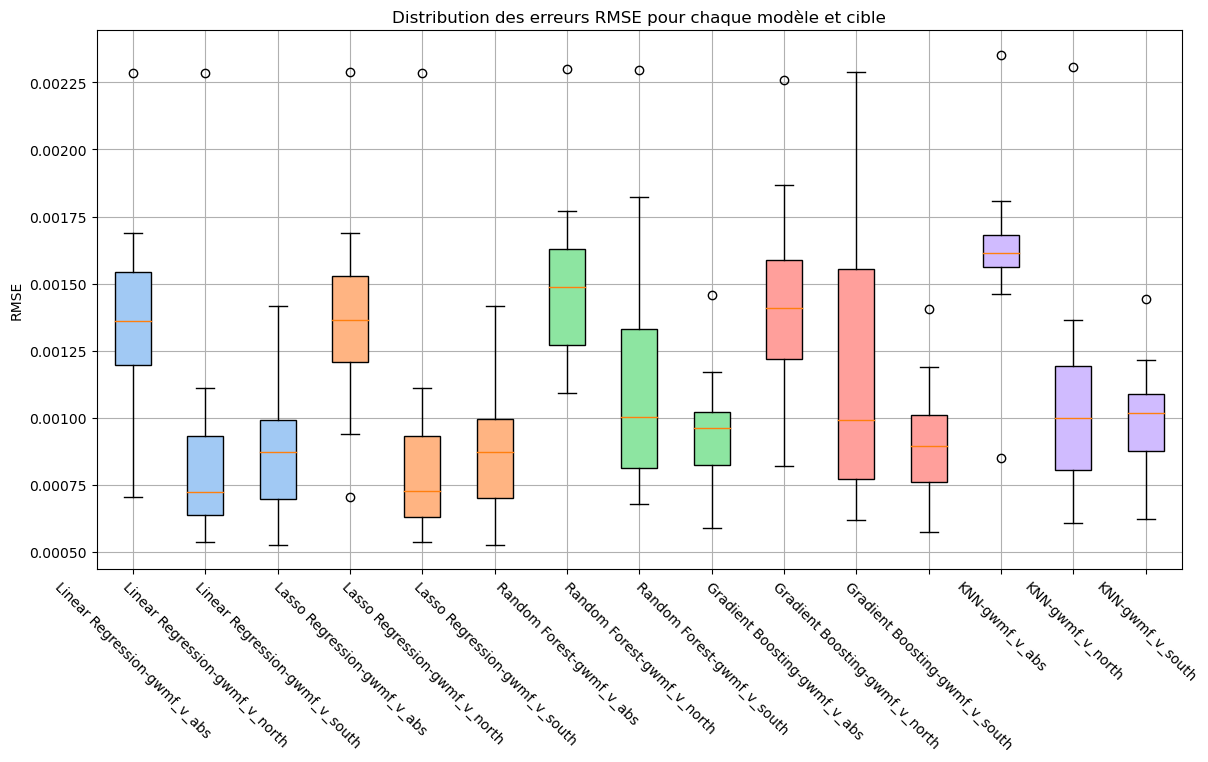

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Préparation des données pour le tracé
data_to_plot = []
labels = []
colors = []
palette = sns.color_palette("pastel", len(rmse_errors))  # Génère une palette de couleurs

for idx, (model_name, targets) in enumerate(rmse_errors.items()):
    for target, errors in targets.items():
        data_to_plot.append(errors)
        labels.append(f"{model_name}-{target}")
        colors.append(palette[idx])  # Même couleur pour un modèle donné

# Configuration de la taille de la figure
plt.figure(figsize=(14, 7))

# Tracer les boîtes à moustaches
parts = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)

# Appliquer les couleurs
for part, color in zip(parts['boxes'], colors):
    part.set_facecolor(color)

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=-45)
plt.title('Distribution des erreurs RMSE pour chaque modèle et cible')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


In [ ]:
# Chargement du dictionnaire des résultats des modèles depuis le fichier
with open('rmse_scores.pickle', 'rb') as handle:
    dict_erreurs = pickle.load(handle)

dict_erreurs

{'gwmf_v_abs': [0.0006395115375160521,
  0.0007656567696686453,
  0.000897044786161944,
  0.0006371166773594793,
  0.000678931117292416,
  0.00029448619460693907,
  0.0005629832370587967,
  0.0006967122431745627],
 'gwmf_v_north': [0.0007588382134017024,
  0.00037721130766926075,
  0.00043933402438931863,
  0.00032452804380977057,
  0.00039240061629645094,
  0.00019663254435803561,
  0.00032106533570809174,
  0.0003753977746939401],
 'gwmf_v_south': [0.00034005872080365474,
  0.000417273628740851,
  0.000546945624718303,
  0.000281513160318491,
  0.0004969398154907031,
  0.00020094201550496083,
  0.00045789191453007004,
  0.00042835377732036755]}

## **Améliroation des modèles : fine - tunning**

Pour améliorer nos modèles de régression linéaire et de forêt aléatoire, on peut envisager plusieurs strtégies :

### 1. **Amélioration de la régression linéaire**

**Normalisation ou standardisation des variables** : Étant donné que les coefficients de la régression linéaire sont sensibles à l'échelle des variables, normaliser ou standardiser vos données peut aider à améliorer la performance du modèle.


**Sélection de variables** : Éliminer les variables peu informatives ou hautement corrélées pourrait améliorer les performances de votre modèle en réduisant le surajustement.


**PolynomialFeatures** : Vous pouvez introduire de la complexité dans le modèle en utilisant des caractéristiques polynomiales pour capter les relations non linéaires entre les variables.


### 2. **Amélioration de la forêt aléatoire**

**Optimisation des hyperparamètres** : Ajuster les hyperparamètres tels que n_estimators (nombre d'arbres), max_features, max_depth, et min_samples_split peut considérablement affecter la performance de votre modèle.


**Validation croisée** : Au lieu de séparer les données en un seul ensemble de formation et de test, utilisez la validation croisée pour mieux évaluer la performance du modèle. Pour votre cas spécifique, vous pouvez implémenter une validation croisée qui respecte la séparation par ballons

In [ ]:
""" Mise en place de l'amélioration du Random Forest """
features = ['tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19', 'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']
targets = ['gwmf_v_abs', 'gwmf_v_north', 'gwmf_v_south']

''' test de diffrenets parametres : '''

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

''' validation croisée : '''

kf = KFold(n_splits=7, shuffle=False)  # atttention : Pas de mélange car l'ordre des ballons doit être respecté

# stockage des scores RMSE
rmse_scores = {target: [] for target in targets}

for train_index, test_index in kf.split(np.unique(df_direction['balloon'])):
    # Création des ensembles de données de train et de test basés sur le ballon
    train_balloon = np.unique(df_direction['balloon'])[train_index]
    test_balloon = np.unique(df_direction['balloon'])[test_index]

    train_data = df_direction[df_direction['balloon'].isin(train_balloon)]
    test_data = df_direction[df_direction['balloon'].isin(test_balloon)]

    X_train, y_train = train_data[features], train_data[targets]
    X_test, y_test = test_data[features], test_data[targets]

    for target in targets:
        # on fait d'abord la recherche de meilleur parametre 
        grid_search = GridSearchCV(rf_reg, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        print(f'Best params for {target} : {best_params}')

        rf_reg = RandomForestRegressor(random_state=42)
        rf_reg.fit(X_train, y_train[target])
        rf_pred = rf_reg.predict(X_test)
        rmse = mean_squared_error(y_test[target], rf_pred, squared=False)
        rmse_scores[target].append(rmse)



# Calcul et affichage des RMSE moyens pour chaque cible
for target, scores in rmse_scores.items():
    average_rmse = np.mean(scores)
    print(f"RMSE for {target}: {average_rmse}")


### 3. **Serie temporelle : Introduction d'un LAG**


sources : 
- https://machinelearningmastery.com/random-forest-for-time-series-forecasting/
- https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/


Le Random Forest peut aussi être utilisé pour les prévisions de séries temporelles, mais cela nécessite de transformer d'abord les données de séries temporelles en un problème d'apprentissage supervisé. De plus, pour évaluer le modèle, il faut utiliser une technique spécifique nommée la validation progressive, car l'usage de la validation croisée k-fold pourrait engendrer des résultats faussement optimistes.

####            - **1ère étape :** la manipulation des données pour prendre en compte la temporalité 

L'idée dans cette partie c'est de prendre en compte la temporalité en ajoutant pour chaque obseveration une ou plusiuurs varaibles qui correspondent au périodes précendentes.  Cette transformation permet d'intégrer la dépendance temporelle dans les données, ce qui est crucial pour les modèles prédictifs de séries temporelles comme le Random Forest.


In [181]:

def series_to_supervised(df, n_in=1, n_out=1, dropnan=True, target_vars=None):
    """
    Cette fonction prend un DataFrame, crée des séquences d'entrées et de sorties en fonction des décalages spécifiés par n_in et n_out, 
    et retourne un nouveau DataFrame qui peut être utilisé pour entraîner des modèles de machine learning comme le Random Forest.

    Le Dataframe original sera transformé ajoutant plusiueurs nouvelles colonnes :

        La première colonne sera un décalage de 1 pas de temps (t-1)
        La deuxième colonne sera un décalage de 2 pas de temps (t-2), et ainsi de suite jusqu'à 3 pas de temps dans le passé (t-3).
        ...
        La N-ieme colonne sera un décalage de i pas de temps (t-i) et ainsi de suite. 

        La dernière colonne (t+0 ou simplement t) sera la valeur actuelle (valeur cible pour les prédictions basées sur les valeurs i pas de temps précédents)
    args : 
            => n_in : nb de valeusr passées souhaités
            => n_out : nb de valeurs futures souhaités - 1 

    """
    if target_vars is None:
        print ('Aucune variable cible selectionée !! ')
        return df  # Si aucune cible spécifique n'est donnée, rien changer

    n_vars = 1 if type(df) is list else df.shape[1]
    df = pd.DataFrame(df)
    cols, names = list(), list()

    # Ajout des valeurs passées :
    for var in target_vars:
        for i in range(n_in, 0, -1):
            cols.append(df[var].shift(i))
            names.append(f'{var}_t-{i}')
    
    # Valeurs futures :
    for var in target_vars:
        for i in range(1, n_out):  
            cols.append(df[var].shift(-i))
            names.append(f'{var}_t+{i}')
      
    # on rassemble toutes les colo,nnes crées : 
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    #Ajout des autres varaibles qui ne sont pas des décalage de notre cible 
    final_df = df.join(agg)
    final_columns = list(df.columns) + names
    final_df = final_df[final_columns]
    
    return final_df


In [182]:
print("DataFrame original:")
df_direction.head(5)

# Transformons ce DataFrame pour inclure 3 lags
transformed_df = series_to_supervised(df_direction, n_in=3, n_out=2, dropnan=True, target_vars= ['gwmf_v_abs', 'gwmf_v_north',	'gwmf_v_south'])

print("DataFrame transformé pour l'apprentissage supervisé:")
transformed_df.head(5)

DataFrame original:
DataFrame transformé pour l'apprentissage supervisé:


,balloon,gwmf_v,gwmf_v_abs,gwmf_v_north,gwmf_v_south,tp,lnsp,temp19,temp9,temp2,...,gwmf_v_abs_t-1,gwmf_v_north_t-3,gwmf_v_north_t-2,gwmf_v_north_t-1,gwmf_v_south_t-3,gwmf_v_south_t-2,gwmf_v_south_t-1,gwmf_v_abs_t+1,gwmf_v_north_t+1,gwmf_v_south_t+1
0,1,-0.004952,0.004419,0.000404,0.005356,1.283398e-05,11.520824,198.78241,246.25427,288.58835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-0.000536,0.001380,0.000718,0.001254,1.818147e-05,11.521313,198.87085,246.25975,288.65485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.000377,0.000965,0.000669,0.000292,6.938894e-18,11.521270,198.46156,246.25015,289.30478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.000567,0.000584,0.000590,0.000022,6.938894e-18,11.521748,198.43893,246.24603,289.34730,...,0.000965,0.000404,0.000718,0.000669,0.005356,0.001254,0.000292,0.000638,0.000402,0.000360
4,1,0.000042,0.000638,0.000402,0.000360,6.938894e-18,11.522120,198.35872,246.30430,289.43370,...,0.000584,0.000718,0.000669,0.000590,0.001254,0.000292,0.000022,0.000457,0.000495,0.000152


###            **2nd étape :** The  forward validation / Backtest(validation passée) 


Lors de la préparation d'un ensemble de données pour l'ajustement et l'évaluation d'un modèle, il est important de s'assurer de sa bonne utilisation. Nottament, il ne serait pas valable d'adapter un modèle à des données futures et de lui demander de prédire le passé. Le modèle doit être entraîné sur des données passées pour prédire l'avenir avec précision.

Les méthodes telles que la validation croisée k-fold, qui randomise l'ensemble de données pendant l'évaluation, ne peuvent pas être utilisées dans ce cas. En revanche, la validation par anticipation est employée. Dans la validation par anticipation, l'ensemble de données est divisé en ensembles de formation et de test en sélectionnant un point de coupure. Par exemple, toutes les données à l'exception des 12 derniers mois sont utilisées pour la formation, tandis que les 12 derniers mois sont réservés au test.

Afin d'évaluer les performances du modèle pour une prévision en une étape, par exemple un mois à l'avance, le modèle est entraîné sur l'ensemble de données d'entraînement et utilisé pour prévoir la première étape dans l'ensemble de données de test. Ensuite, l'observation réelle de l'ensemble de données de test est ajoutée à l'ensemble de données d'apprentissage, le modèle est réajusté et le processus est répété pour prédire la deuxième étape de l'ensemble de données de test.

En répétant ce processus pour l'ensemble des données de test, il est possible d'obtenir une prédiction en une étape pour l'ensemble des données de test et donc de connaitre la perf de notre modèle. 

Il est important de résumer pourquoi nous utilisons ce type de méthode dans notre cas : car nous travaillons avec une série temporelle multivariée. Nous avons : 

#### 1. **Plusieurs Variables d'Intérêt (Variables Cibles)**
Plusieurs variables cibles telles que `gwmf_v_abs`, `gwmf_v_north`, et `gwmf_v_south`, qui sont toutes liées à des mesures de flux de quantité de mouvement. Dans les séries temporelles multivariées, plusieurs variables dépendantes sont observées à travers le temps, et souvent, ces variables peuvent avoir des interactions ou des corrélations entre elles. Cela indique que les modèles doivent non seulement apprendre à partir du temps mais également des relations entre ces différentes variables.

#### 2. **Variables Explicatives Temporelles**
Esnuiete, outre les variables cibles, nos données comprennes également un ensemble de variables explicatives comme `tp`, `lnsp`, `temp19`, etc., qui sont également observées à travers le temps. Ces variables peuvent être des prédicteurs importants pour vos variables cibles, et leur nature temporelle ajoute une couche de complexité car leurs valeurs passées peuvent influencer les valeurs futures des variables cibles.

#### 3. **Dépendance Temporelle**
C'est un des points majeur de cette deuxieme partie du projet : il est clair que les données sont structurées dans le temps (séries temporelles), ce qui signifie que les observations sont non seulement liées entre elles par leurs caractéristiques mais aussi par leur position dans le temps. Par exemple, les conditions météorologiques d'un jour donné (une combinaison de variables telles que température, pression, etc.) sont susceptibles d'influencer les conditions des jours suivants. La dépendance temporelle dans les données multivariées nécessite des techniques de modélisation qui peuvent capturer à la fois les interactions entre variables et la dépendance dans le temps.

#### 4. **Complexité de Modélisation**
Dans les séries temporelles multivariées, les modèles doivent non seulement prédire plusieurs variables futures mais aussi comprendre et utiliser les interactions complexes entre plusieurs séries d'entrée. Cela est différent des séries temporelles univariées, où une seule série est prédite sans les influences directes d'autres variables mesurées.

#### 5. **Objectifs de Prédiction et d'Analyse**
L'objectif de prédire plusieurs composantes de la quantité de mouvement et d'analyser l'importance des diverses variables explicatives indique un problème de série temporelle multivariée. On souhaites chercher à comprendre comment divers facteurs (à divers points dans le temps) influencent les résultats, ce qui est typique des analyses de séries temporelles multivariées.

In [183]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def train_test_split(data, n_test):
    ''' separe les données en test et train'''
    return data[:-n_test], data[-n_test:]

def random_forest_forecast(train, testX):
    ''' applique le modele random forest à anos données pour faire de la prédiction '''
    # Convert train dataset into a matrix
    train = np.array(train)
    # Fit the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train[:, :-1], train[:, -1])
    # Make a prediction
    y_pred = model.predict([testX])
    return y_pred[0]

def walk_forward_validation(data, n_test):
    predictions = []
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions


Pour intégrer la spécificité des 8 ballons mesurant les mêmes variables à différents endroits de la Terre tout en utilisant la validation progressive (walk-forward validation), il est important d'ajuster l'approche pour traiter chaque ballon individuellement. Cela garantira que le modèle apprend de la séquence temporelle propre à chaque ballon sans mélanger les données entre différents ballons, ce qui pourrait entraîner des conclusions incorrectes en raison des variations environnementales entre les sites

In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def walk_forward_validation(data, target_var):
    predictions = []
    errors = []
    # Séparation des données par ballon
    for name, group in data.groupby('balloon'):
        print(f"Processing Balloon: {name}")
        group = series_to_supervised(group, n_in=3, n_out=1, dropnan=True, target_vars=[target_var])
        group.dropna(inplace=True)
        n_test = int(len(group) * 0.2)
        train, test = group[:-n_test], group[-n_test:]
        history = train.copy()  # Utilisez copy pour garder un DataFrame
        
        ballon_predictions = []
        for i in range(len(test)):
            X_train = history.drop(target_var, axis=1)
            y_train = history[target_var]
            X_test = test.iloc[i].drop(target_var)
            y_test = test.iloc[i][target_var]
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)
            yhat = model.predict([X_test.values])[0]  # Assurez-vous d'utiliser .values pour obtenir un array
            ballon_predictions.append(yhat)
            
            # Ajout de la ligne test actuelle à l'historique après la prédiction
            history = pd.concat([history, test.iloc[i:i+1]], ignore_index=True)  # Utilisez pd.concat pour ajouter la ligne

        error = mean_squared_error(test[target_var], ballon_predictions)
        errors.append(error)
        predictions.append(ballon_predictions)
    average_error = np.mean(errors)
    return average_error, errors, predictions

# Exemple d'utilisation, en supposant que df_direction est correctement préparé
error, errors_per_ballon, predictions = walk_forward_validation(df_direction, 'gwmf_v_abs')
print(f'Overall MSE: {error:.3f}')


Processing Balloon: 1


/Users/aminerazig/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/aminerazig/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/aminerazig/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/aminerazig/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/aminerazig/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.w

KeyboardInterrupt: 

In [ ]:
###### TOO LONG ........

###            **3nd étape :** validation croissées sur chaques ballons / "Leave-One-Group-Out"

Pour préparer un modèle de Random Forest qui généralise bien aux données d'un nouveau ballon, il est crucial de construire un modèle robuste qui comprend bien les caractéristiques communes entre tous les ballons existants. L'approche la plus efficace dans ce cas serait d'utiliser une stratégie où on entraine le modèle sur les données de tous les ballons disponibles, en excluant chaque fois un ballon différent pour tester la performance du modèle. Cela donnera une idée de la capacité du modèle à généraliser à des données non vues, simulant la situation où un nouveau ballon apparaît.

    => Cross-Validation par Ballon


In [184]:
""" Evaluation des modeles avace validation croissées sur chaques ballons Avec ajout de lags """

kf = KFold(n_splits=8, shuffle=False)  # atttention : Pas de mélange car l'ordre des ballons doit être respecté

transformed_df = series_to_supervised(df_direction, n_in=3, n_out=2, dropnan=True, target_vars= ['gwmf_v_abs', 'gwmf_v_north',	'gwmf_v_south'])
transformed_df.dropna(inplace=True)
targets = ['gwmf_v_abs', 'gwmf_v_north', 'gwmf_v_south']
features = [col for col in transformed_df.columns if col not in targets]
features.remove('gwmf_v')

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': LassoCV(cv=5, random_state=42),  # Utilisation d'un cv interne pour LassoCV
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Création d'un KFold pour la validation croisée
kf = KFold(n_splits=8, shuffle=False)  # Pas de mélange, l'ordre des ballons doit être respecté

# Dictionnaire pour stocker les erreurs RMSE pour chaque modèle et chaque target
rmse_lag_errors = {name: {target: [] for target in targets} for name in models}

for train_index, test_index in kf.split(np.unique(transformed_df['balloon'])):
    print ( f'En cours ... ballon{test_index} ...'  )
    # Création des ensembles de données de train et de test basés sur le ballon
    train_balloon = np.unique(transformed_df['balloon'])[train_index]
    test_balloon = np.unique(transformed_df['balloon'])[test_index]

    train_data = transformed_df[transformed_df['balloon'].isin(train_balloon)]
    test_data = transformed_df[transformed_df['balloon'].isin(test_balloon)]

    X_train, y_train = train_data[features], train_data[targets]
    X_test, y_test = test_data[features], test_data[targets]
    
    # Boucle sur chaque modèle et chaque cible
    for name, model in models.items():
        for target in targets:
            model.fit(X_train, y_train[target])
            predictions = model.predict(X_test)
            rmse = mean_squared_error(y_test[target], predictions, squared=False)
            rmse_lag_errors[name][target].append(rmse)

# Affichage des RMSE moyens pour chaque modèle et chaque cible
for name, errors in rmse_lag_errors.items():
    print(f'______________________ \n *** {name.upper()} *** \n ______________________')
    for target, rmses in errors.items():
        average_rmse = np.mean(rmses)
        print(f"Average RMSE for {target}: {average_rmse:.3f}")


En cours ... ballon[0] ...
En cours ... ballon[1] ...
En cours ... ballon[2] ...


KeyboardInterrupt: 

In [96]:
import pickle

with open('rmse_errors.pickle', 'wb') as f:
    pickle.dump(rmse_lag_errors, f)


In [187]:

transformed_df = series_to_supervised(df_direction, n_in=3, n_out=2, dropnan=True, target_vars= ['gwmf_v_abs', 'gwmf_v_north',	'gwmf_v_south'])
transformed_df.dropna(inplace=True)
targets = ['gwmf_v_abs', 'gwmf_v_north', 'gwmf_v_south']
features = [col for col in transformed_df.columns if col not in targets]
features.remove('gwmf_v')

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def prediction_sur_ballon(df, num_ballon=1):
    # Création d'un dictionnaire pour stocker les DataFrames par ballon
    dict_balloon = {i: df[df['balloon'] == i] for i in range(1, 9)}
    
    # Création des listes des indices pour le train et le test
    train_indices = [i for i in range(1, 9) if i != num_ballon]
    
    # Utilisation du dictionnaire pour créer les ensembles de train et de test
    train_df = pd.concat([dict_balloon[i] for i in train_indices])
    test_df = dict_balloon[num_ballon]

    X_train = train_df[features]
    y_train = train_df[targets]
    X_test = test_df[features]
    y_test = test_df[targets]

    # Modélisation et évaluation pour chaque cible
    results = {}
    for target in targets:
        # Régression linéaire
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train[target])
        lin_pred = lin_reg.predict(X_test)
        lin_rmse = mean_squared_error(y_test[target], lin_pred, squared=False)
        
        # Random forest
        rf_reg = RandomForestRegressor(random_state=42)
        rf_reg.fit(X_train, y_train[target])
        rf_pred = rf_reg.predict(X_test)
        rf_rmse = mean_squared_error(y_test[target], rf_pred, squared=False)
        
        # Importance des variables pour le Random forest
        feature_importances = pd.Series(rf_reg.feature_importances_, index=features).sort_values(ascending=False)

        # Graphique des prédictions et des valeurs réelles
        plt.figure(figsize=(20, 10))
        plt.plot(y_test[target].reset_index(drop=True), label='Valeurs réelles')
        plt.plot(lin_pred, label='Prédiction Régression Linéaire', color='red', linestyle='--', linewidth=0.6)
        plt.plot(rf_pred, label='Prédiction Forêt Aléatoire', color='purple', linestyle='--', linewidth=0.6)
        plt.title(f'Comparaison des prédictions pour {target}')
        plt.xlabel('Index')
        plt.ylabel(target)
        plt.legend()
        plt.grid(True)
        plt.show()

        results[target] = {
            'Linear Regression RMSE': lin_rmse,
            'Random Forest RMSE': rf_rmse,
            'Feature Importances': feature_importances
        }

    for target, result in results.items():
        print(f"Results for {target}:")
        print(f"Linear Regression RMSE: {result['Linear Regression RMSE']}")
        print(f"Random Forest RMSE: {result['Random Forest RMSE']}")
        print("Feature Importances:")
        print(result['Feature Importances'])
        print("\n")


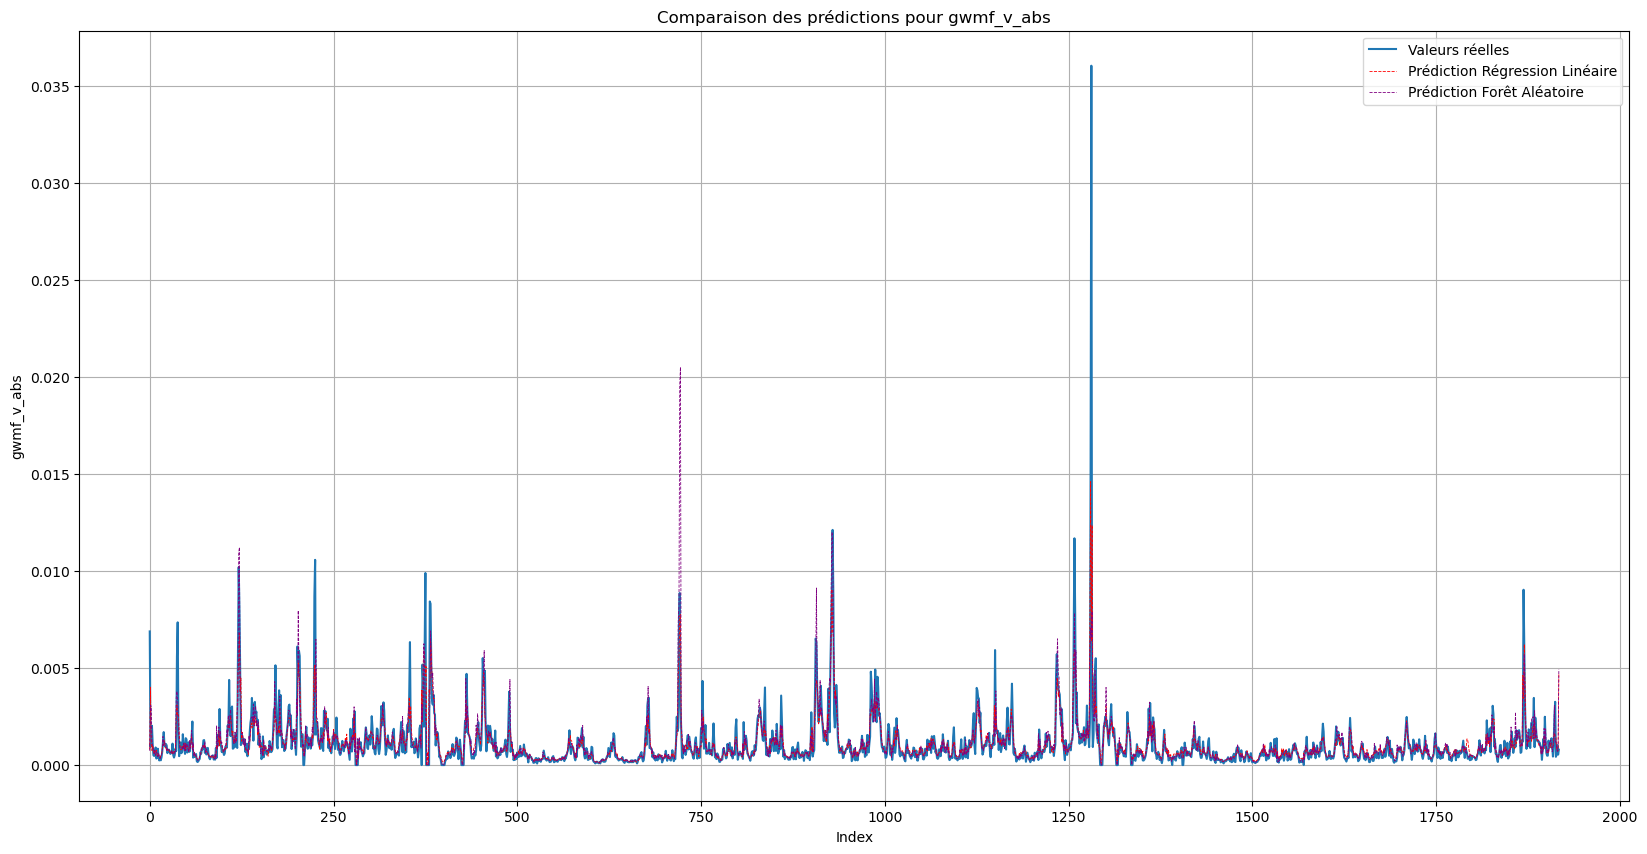

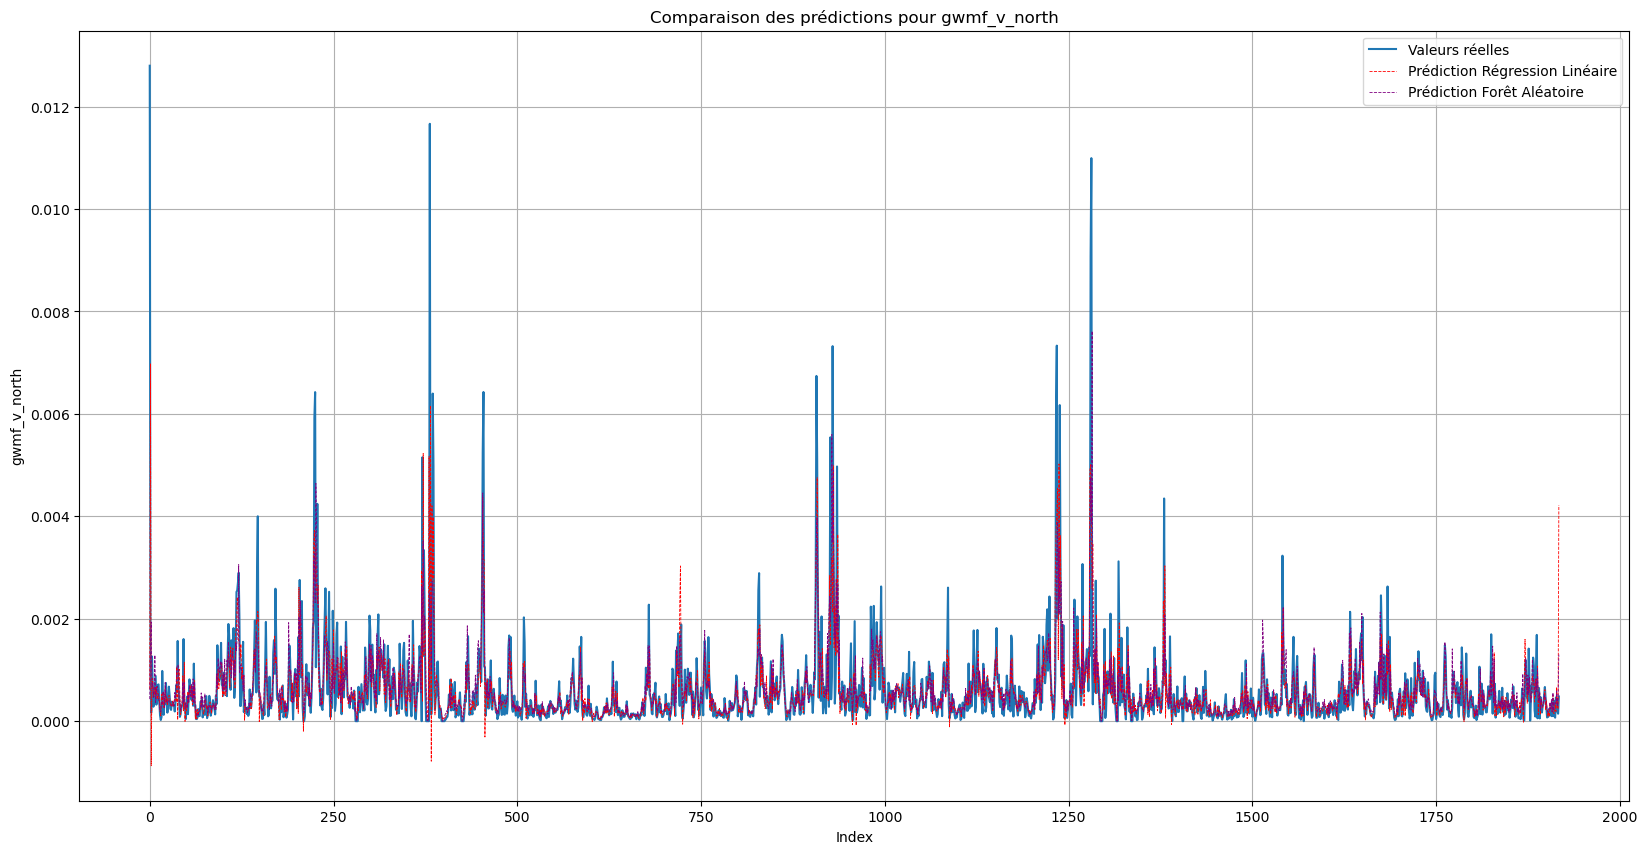

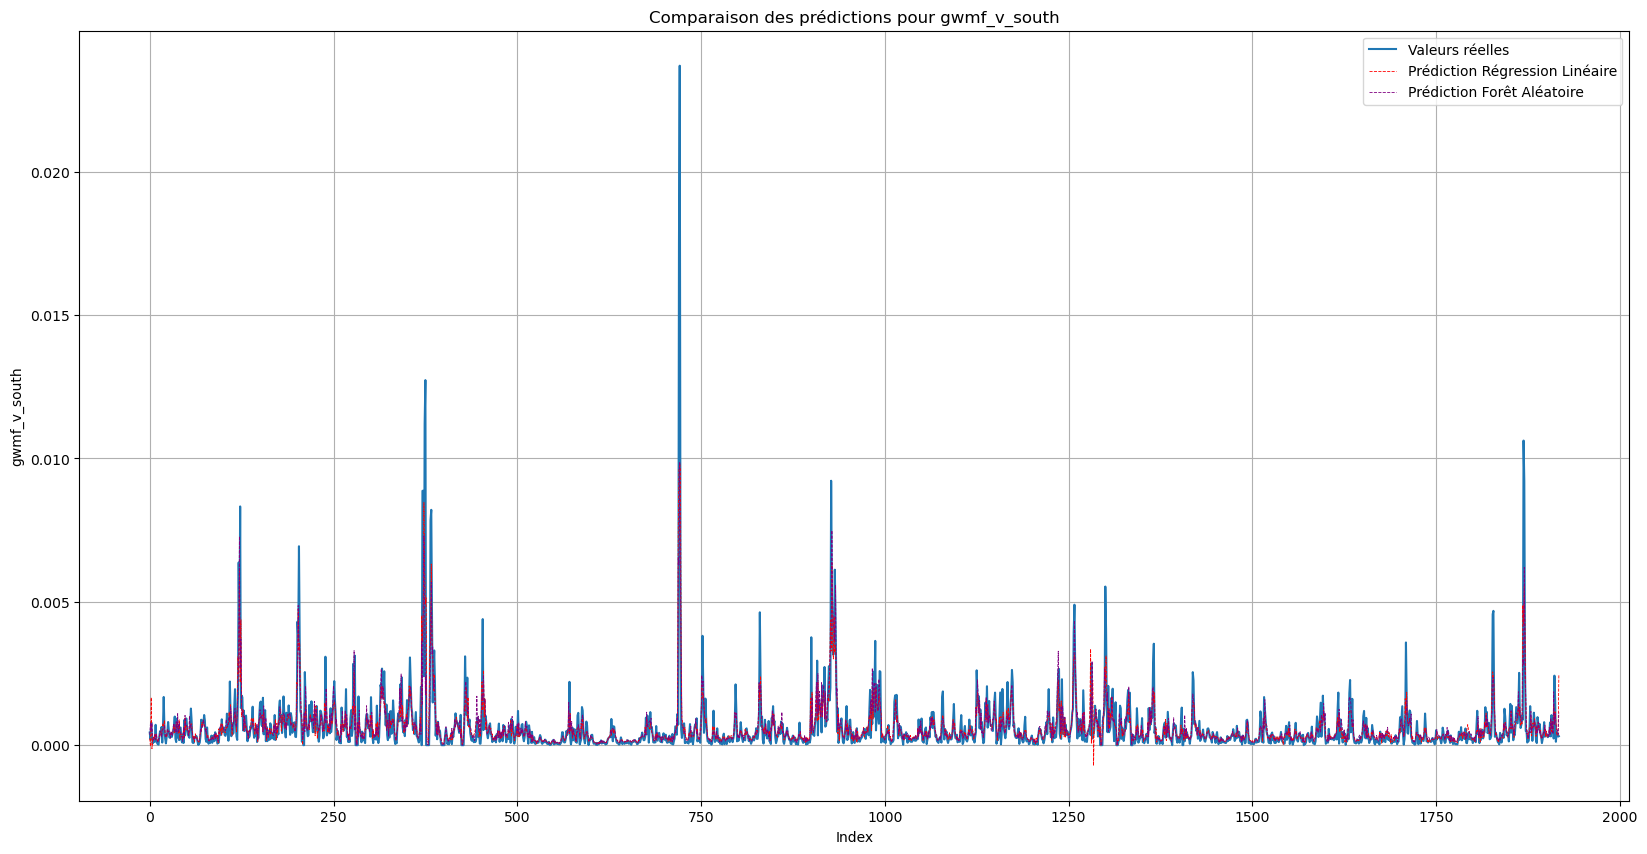

Results for gwmf_v_abs:
Linear Regression RMSE: 0.0010286028085298555
Random Forest RMSE: 0.0011283872015211789
Feature Importances:
gwmf_v_abs_t-1      0.306009
gwmf_v_abs_t+1      0.273893
gwmf_v_south_t-1    0.066079
gwmf_v_north_t+1    0.031928
temp2               0.029528
gwmf_v_south_t+1    0.018832
gwmf_v_abs_t-2      0.016248
temp19              0.015711
u19                 0.015420
gwmf_v_north_t-2    0.015238
v0                  0.014752
u0                  0.013971
gwmf_v_south_t-2    0.013328
tp_sd               0.013086
v9                  0.012813
gwmf_v_north_t-1    0.012509
v19                 0.012030
u2                  0.011995
lnsp                0.011329
gwmf_v_north_t-3    0.011040
tp_mean             0.010161
temp9               0.009954
sza                 0.009608
u9                  0.009194
gwmf_v_abs_t-3      0.009009
v2                  0.008786
temp0               0.008334
tp                  0.008299
gwmf_v_south_t-3    0.008051
balloon             0.0028

In [188]:
prediction_sur_ballon(transformed_df,num_ballon=5)

Results for gwmf_v_abs:
Linear Regression RMSE: 0.0010286028085298555
Random Forest RMSE: 0.0011283872015211789
Feature Importances:
gwmf_v_abs_t-1      0.306009
gwmf_v_abs_t+1      0.273893
gwmf_v_south_t-1    0.066079
gwmf_v_north_t+1    0.031928
temp2               0.029528
gwmf_v_south_t+1    0.018832
gwmf_v_abs_t-2      0.016248
temp19              0.015711
u19                 0.015420
gwmf_v_north_t-2    0.015238
v0                  0.014752
u0                  0.013971
gwmf_v_south_t-2    0.013328
tp_sd               0.013086
v9                  0.012813
gwmf_v_north_t-1    0.012509
v19                 0.012030
u2                  0.011995
lnsp                0.011329
gwmf_v_north_t-3    0.011040
tp_mean             0.010161
temp9               0.009954
sza                 0.009608
u9                  0.009194
gwmf_v_abs_t-3      0.009009
v2                  0.008786
temp0               0.008334
tp                  0.008299
gwmf_v_south_t-3    0.008051
balloon             0.002866
dtype: float64


Results for gwmf_v_north:
Linear Regression RMSE: 0.0007563161422834812
Random Forest RMSE: 0.0007116771397854907
Feature Importances:
gwmf_v_north_t+1    0.343233
gwmf_v_north_t-1    0.293346
gwmf_v_abs_t-1      0.059036
gwmf_v_south_t-1    0.022035
gwmf_v_north_t-2    0.020486
gwmf_v_abs_t+1      0.018793
u19                 0.016186
u9                  0.014550
temp2               0.013077
tp_sd               0.012555
gwmf_v_south_t+1    0.011901
v0                  0.011843
gwmf_v_abs_t-3      0.011613
gwmf_v_north_t-3    0.011246
u0                  0.011132
v9                  0.010571
sza                 0.010389
v19                 0.010192
temp0               0.010144
gwmf_v_abs_t-2      0.010141
gwmf_v_south_t-3    0.009681
u2                  0.009203
v2                  0.008777
temp19              0.008682
gwmf_v_south_t-2    0.008569
lnsp                0.008339
tp                  0.008088
tp_mean             0.007620
temp9               0.006226
balloon             0.002346
dtype: float64


Results for gwmf_v_south:
Linear Regression RMSE: 0.0007898196335193205
Random Forest RMSE: 0.0008144527119052781
Feature Importances:
gwmf_v_south_t+1    0.280143
gwmf_v_south_t-1    0.280030
gwmf_v_abs_t-2      0.042560
gwmf_v_south_t-2    0.031874
gwmf_v_abs_t+1      0.031612
gwmf_v_abs_t-1      0.025316
gwmf_v_south_t-3    0.019362
temp19              0.017556
gwmf_v_north_t+1    0.016394
gwmf_v_north_t-2    0.015965
sza                 0.015270
u19                 0.014457
gwmf_v_north_t-3    0.013601
temp0               0.013571
u9                  0.013059
u0                  0.012870
tp_sd               0.012863
u2                  0.012437
gwmf_v_north_t-1    0.012158
v2                  0.012113
lnsp                0.012032
v9                  0.012001
gwmf_v_abs_t-3      0.011902
temp9               0.011819
v0                  0.011759
v19                 0.011265
tp                  0.010709
tp_mean             0.010653
temp2               0.009927
balloon             0.004719
dtype: float64

## **Mise en place d'un ensemble de validation** : optimisation des hyperparamètres et évaluation du modèle 

Meilleurs paramètres: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}

Train RMSE: 0.00032515675290352365

Validation RMSE: 0.0003020658905824527

Test RMSE: 0.00033091338620435626

Possible overfitting detected.
Validation performance is better than test, indicating good hyperparameter tuning but poor generalization.


In [102]:
#  données de ballons 1 à 6 pour l'entraînement
train_transformed_df = transformed_df[transformed_df['balloon'] <= 6]

# données du ballon 7 pour la validation
validation_transformed_df = transformed_df[transformed_df['balloon'] == 7]

# données du ballon 8 pour le test
test_transformed_df = transformed_df[transformed_df['balloon'] == 8]

# Préparation des ensembles de données
X_train = train_transformed_df[features]
y_train = train_transformed_df[targets]
X_val = validation_transformed_df[features]
y_val = validation_transformed_df[targets]
X_test = test_transformed_df[features]
y_test = test_transformed_df[targets]


In [107]:
''' l'optimisation des hyperparamètres et l'évaluation du modèle '''

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Évaluation RMSE sur l'ensemble d'entraînement
train_predictions = best_model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)

# Évaluation RMSE sur l'ensemble de validation
val_predictions = best_model.predict(X_val)
val_rmse = mean_squared_error(y_val, val_predictions, squared=False)

# Évaluation RMSE sur l'ensemble de test
test_predictions = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

# Afficher les résultats
print("Meilleurs paramètres:", grid_search.best_params_)
print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test RMSE: {test_rmse}")

# Diagnostic d'Overfitting
if train_rmse < val_rmse or train_rmse < test_rmse:
    print("Possible overfitting detected.")
    if val_rmse < test_rmse:
        print("Validation performance is better than test, indicating good hyperparameter tuning but poor generalization.")
    else:
        print("Test performance is not significantly worse than validation, model generalizes acceptably.")
else:
    print("No significant overfitting detected. Model generalizes well.")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...max_depth=4, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=4, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=4, max_features=auto, n_estimators=200; total time=   0.3s
[CV] END ...max_depth=4, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=4, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END ...max_depth=4, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END ...max_depth=4, max_features=auto, n_estimators=300; total time=   0.1s
[CV] END ...max_depth=4, max_features=auto, n_estimators=300; total time=   0.1s
[CV] END ...max_depth=4, max_features=auto, n_estimators=300; total time=   0.1s
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=100; total time=   6.9s
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=100; total time=  14.7s
[CV] END ...max_depth=4, max_features=sqrt, n_es

/Users/aminerazig/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aminerazig/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aminerazig/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/aminerazig/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constrai

Meilleurs paramètres: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
Train RMSE: 0.00032515675290352365
Validation RMSE: 0.0003020658905824527
Test RMSE: 0.00033091338620435626
Possible overfitting detected.
Validation performance is better than test, indicating good hyperparameter tuning but poor generalization.


In [ ]:
# Création d'un dictionnaire pour stocker les DataFrames par ballon
dict_balloon = {}
for i in range(1, 9):
    dict_balloon[i] = transformed_df[transformed_df['balloon'] == i]

# Configuration initiale pour GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8]
}
rf = RandomForestRegressor(random_state=42)

# Stockage des résultats
results = {
    'train_rmse': [],
    'validation_rmse': [],
    'test_rmse': [],
    'best_params': []
}

# Boucle sur chaque ballon pour test et validation
ballons = list(dict_balloon.keys())
for test_ballon in ballons:
    validation_ballon = (test_ballon % len(ballons)) + 1 if (test_ballon % len(ballons)) + 1 != test_ballon else (test_ballon % len(ballons)) + 2
    
    # Séparation des ensembles
    train_df = pd.concat([df for k, df in dict_balloon.items() if k not in [test_ballon, validation_ballon]], ignore_index=True)
    validation_df = dict_balloon[validation_ballon]
    test_df = dict_balloon[test_ballon]

    X_train, y_train = train_df[features], train_df[targets]
    X_val, y_val = validation_df[features], validation_df[targets]
    X_test, y_test = test_df[features], test_df[targets]

    # Optimisation des hyperparamètres et évaluation du modèle
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    results['best_params'].append(grid_search.best_params_)

    # Évaluation des RMSE
    train_rmse = mean_squared_error(y_train, best_model.predict(X_train), squared=False)
    val_rmse = mean_squared_error(y_val, best_model.predict(X_val), squared=False)
    test_rmse = mean_squared_error(y_test, best_model.predict(X_test), squared=False)
    results['train_rmse'].append(train_rmse)
    results['validation_rmse'].append(val_rmse)
    results['test_rmse'].append(test_rmse)

# Affichage des résultats moyens
print(f"Average Train RMSE: {np.mean(results['train_rmse'])}")
print(f"Average Validation RMSE: {np.mean(results['validation_rmse'])}")
print(f"Average Test RMSE: {np.mean(results['test_rmse'])}")
print("Best parameters (last iteration):", results['best_params'][-1])
